In [13]:
#import packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [14]:
#Normalising data by dividing by 255
grey_scale = 255
x_train = x_train.astype(float) / grey_scale
x_test = x_test.astype(float) / grey_scale

print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


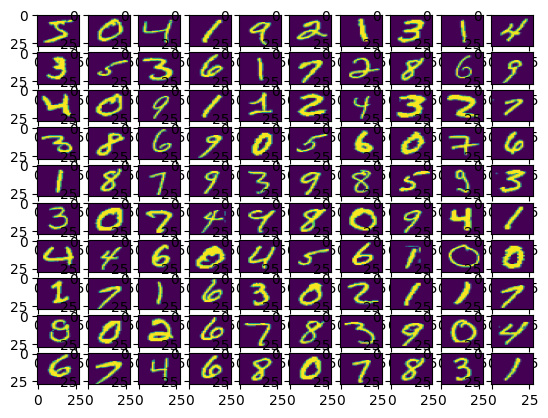

In [15]:
#Visualising dataset
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()

In [16]:
#Building the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/home/pranav90/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#Compiling the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [18]:
#Training the model
mod = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32, verbose = 1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8653 - loss: 0.4639 - val_accuracy: 0.9580 - val_loss: 0.1475
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9610 - loss: 0.1329 - val_accuracy: 0.9668 - val_loss: 0.1147
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9748 - loss: 0.0848 - val_accuracy: 0.9687 - val_loss: 0.1031
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9810 - loss: 0.0650 - val_accuracy: 0.9723 - val_loss: 0.0915
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9849 - loss: 0.0472 - val_accuracy: 0.9736 - val_loss: 0.0933
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0354 - val_accuracy: 0.9725 - val_loss: 0.0940
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9924 - loss: 0.0288 - val_accuracy: 0.9749 - val_loss: 0.0899
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9942 - loss: 0.0213 - 

In [19]:
#evaluating the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0944
Test Loss: 0.08600854128599167, Test Accuracy: 0.9761999845504761


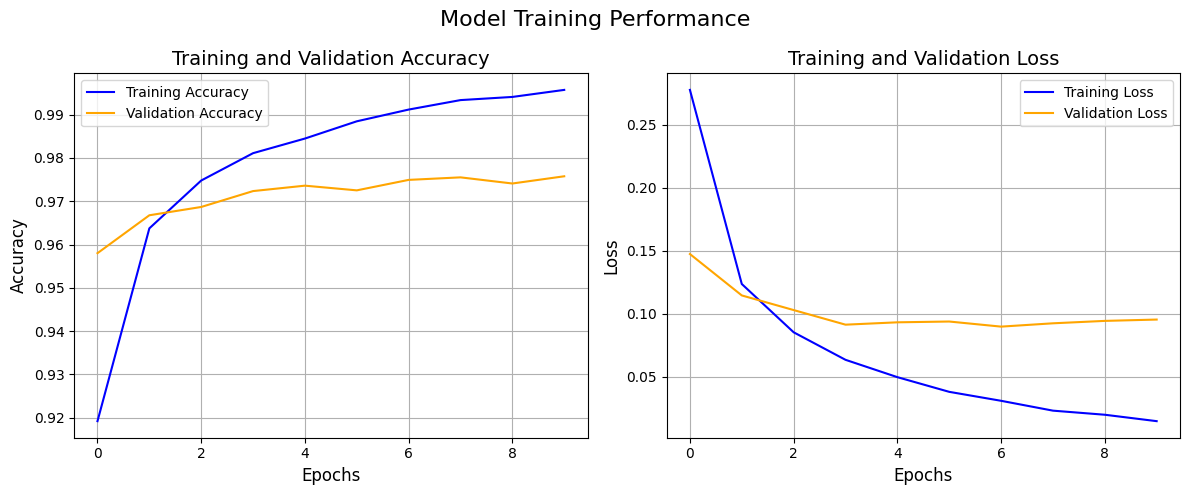

In [20]:
#visualising training and validation loss vs accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mod.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(mod.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(mod.history['loss'], label='Training Loss', color='blue')
plt.plot(mod.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()

plt.show()